<a href="https://colab.research.google.com/github/AaronReichert/DS-Unit-2-Linear-Models/blob/master/module1-regression-1/LS_DS_211_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

# Regression 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

If your **Plotly** visualizations aren't working:
- You must have JavaScript enabled in your browser
- You probably want to use Chrome or Firefox
- You may need to turn off ad blockers
- [If you're using Jupyter Lab locally, you need to install some "extensions"](https://plot.ly/python/getting-started/#jupyterlab-support-python-35)

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [0]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [0]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

In [0]:
# rename and look at the data frame
df_rent=df.copy()
df_rent.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# important imports
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import plotly.express as px


In [0]:
#quick correlation dataframe
corr_rent=df_rent.corr()
corr_rent.head()

,bathrooms,bedrooms,latitude,longitude,price,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
bathrooms,1.000000,0.524077,0.013445,-0.020129,0.687297,0.132889,0.021484,0.096929,0.024547,0.157179,0.172235,0.129553,-0.013200,0.148338,-0.016209,0.209369,0.102116,0.144453,0.233041,0.089076,0.136991,0.113317,0.066828,0.140769,-0.001942,0.014262,0.096285,0.066941,-0.003401
bedrooms,0.524077,1.000000,0.003450,0.055141,0.535494,-0.024830,-0.011181,0.096410,-0.009758,-0.047569,0.152094,0.162993,0.008555,0.013145,0.001416,0.151786,0.045448,0.124908,0.189411,0.061003,0.097769,0.033439,0.000905,0.099147,-0.014882,-0.107343,0.070759,0.012304,0.003232
latitude,0.013445,0.003450,1.000000,0.328711,-0.036214,-0.010421,-0.029710,0.018739,-0.030862,-0.043302,-0.020528,-0.026710,-0.041604,-0.108374,0.026841,-0.044285,-0.063147,-0.079864,0.017174,-0.030933,0.016897,0.027036,-0.056059,0.006486,-0.060021,-0.015626,-0.000569,-0.068300,-0.117158
longitude,-0.020129,0.055141,0.328711,1.000000,-0.251018,-0.189887,-0.058539,-0.108550,-0.070387,-0.275758,-0.169259,-0.088078,-0.044574,-0.254968,0.000159,-0.130155,-0.161472,-0.098611,-0.024815,-0.125641,-0.035488,-0.075054,-0.108004,-0.049025,0.046732,-0.060026,-0.029858,-0.063638,-0.102952
price,0.687297,0.535494,-0.036214,-0.251018,1.000000,0.207180,0.051465,0.101515,0.060412,0.276224,0.223908,0.132249,-0.019414,0.228782,-0.029115,0.271200,0.122933,0.142151,0.242915,0.090273,0.139142,0.134516,0.071433,0.145975,-0.013248,0.007103,0.103675,0.072519,0.011519


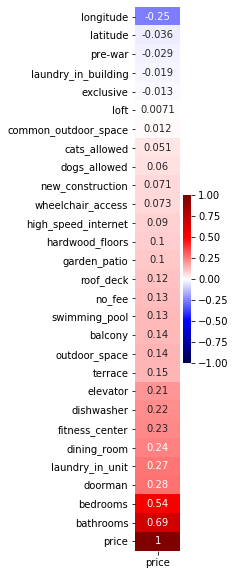

In [0]:
# now we can see the correlation easily at a glance
plt.figure(figsize=(1,10))
sns.heatmap(corr_rent[['price']].sort_values(by=['price']), cmap='seismic', vmin=-1, vmax=1, annot=True)
plt.show()

In [0]:
# now to get the linear regression up and running
model=LinearRegression()
# this sets up the data
features=['bathrooms']
target='price'
X_train=df_rent[features]
y_train=df_rent[target]
# this tells the regression model to learn from the data provided
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# lets test this method
y_pred=model.predict(X_train)

In [0]:
# I like graphs
px.scatter(df_rent,x='price',y='bathrooms', opacity=.05,trendline='ols',trendline_color_override='red',title='Price per bathroom')


In [0]:
# ok now for the function
def predict(bathrooms):
  y_pred=model.predict([[bathrooms]])
  estimate=y_pred[0]
  coefficient=model.coef_[0]
  result=f'${estimate:,.0f} estimated price for an appartment with {bathrooms:.0f} bathrooms in NYC.'
  explination=f'In this linear regression, each aditional bathroom adds ${coefficient:,.0f}, or half bathrom adds ${coefficient/2:,.0f}'
  return result+'\n'+explination

In [0]:
print(predict(2))

$-1,159,952 estimated price for an appartment with 2 bathrooms in NYC.
In this linear regression, each aditional bathroom adds $-15,315, or half bathrom adds $-7,658


In [0]:
print(predict(3.5))

$9,494 estimated price for an appartment with 4 bathrooms in NYC./nIn this linear regression, each aditional bathroom adds $2,573, or half bathrom adds $1,287


In [0]:
# ok lets do this for a continuous variable
# first set up the regressior and training
model=LinearRegression()
features=['longitude']
target='price'
X_train=df_rent[features]
y_train=df_rent[target]
model.fit(X_train,y_train)

# then the function
def predict_long(long):
  y_pred=model.predict([[long]])
  estimate=y_pred[0]
  coefficient=model.coef_[0]
  result=f'${estimate:,.0f} estimated price for an apartment with the longitude of {long:.4f} degrees of longitude in NYC.'
  explination=f'\nIn this linear regression every -0.01 degree of longitude adds ${-coefficient/100:,.2f}'
  return result+explination

In [0]:
# what are the longitudes we are working with here?
df_rent.longitude.describe()

count    48818.000000
mean       -73.972758
std          0.028887
min        -74.087300
25%        -73.991800
50%        -73.978000
75%        -73.955000
max        -73.700100
Name: longitude, dtype: float64

In [0]:
# please only enter latitudes between -73.7001 and -74.0873  
print(predict_long(-73.9))

$2,465 estimated price for an apartment with the longitude of -73.9000 degrees of longitude in NYC.
In this linear regression every -0.01 degree of longitude adds $153.15


In [0]:
# and lets make a picture of NYC
px.scatter(df_rent,x='longitude',y='latitude',color='price',width=900,height=900,opacity=0.1,size='bedrooms',title='I know there are better ways to do this but I was curious')